# Aktienanalyse Projekt - Lösung

Willkommen zu diesem Visualisierungs- und Analyseprojekt. In diesem Projekt werden wir uns Daten vom Aktienmarkt anschauen. Wir wählen dazu einige Technologie-Aktien. Wir werden lernen, wie wir Pandas verwenden können, um diese Daten zu erhalten. Zusätzlich visualisieren wir verschiedene Aspekte. Außerdem schauen wir uns verschiedene Wege an, um das Risiko einer Aktie anhand ihrer bisherigen Performance zu beurteilen. Und zu guter letzt werden wir zukünftige Aktienpreise mit der *Monte Carlo* Methode vorhersagen.

Wir werden uns den folgenden Fragen annehmen:
1. Wie hat sich der Preis einer Aktie im Verlauf der Zeit geändert?
2. Was war die durchschnittliche tägliche Rendite der Aktie?
3. Wie ist der laufende Durchschnitt verschiedener Aktien?
4. Wie sind die Schlusspreise verschiedener Aktien miteinander korreliert?
5. Wie sind die täglichen Renditen verschiedener Aktien miteinander korreliert?
6. Wie können wir versuchen zukünftige Entwicklungen der Aktien vorherzusagen?

**Hinweis: Die Werte der Aktien werden anderst sein, da du dieses Projekt an einem anderen Tag, als an dem wir es für dich erstellen haben, bearbeiten wirst. Somit ändern sich auch die konkreten Ergebnsise der Berechnungen und Visualisierungen. Es geht hierbei darum, die richtigen Berechnungen durchzuführen bzw. stilistisch die selben Visualisierungen zu erzeugen. Die Werte dürfen und werden abweichen.**

## Grundsätzliche Analyse

In diesem Abschnitt des Projekts werden wir uns anschauen, wie man Informationen zu Aktien abrufen kann. Und außerdem wie wir einige grundsätzliche Eigenschaften analysieren können.

**Importiere `Pandas`, aus Pandas im Speziellen `Series` und `DataFrame` sowie `Numpy`.**

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

**Importiere `Matplotlib`, `Seaborn`, setze Seaborn's Style auf "whitegrid" und setzte Matplotlib inline.**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Um die Aktieninformationen abrufen zu können benötigen wir den Pandas Datareader. Falls du diesen noch nicht installiert hast führe folgenden Befehl im Terminal bzw. der Kommandozeile aus:

    conda install pandas-datareader
    
**Importiere `pandas_datareader.data` als "web".**    

In [3]:
import pandas_datareader.data as web

**Importiere `datetime` aus `datetime`.**

In [4]:
from datetime import datetime

Wir geben dir hier die Liste der Aktien an, die wir uns anschauen werden:

In [5]:
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

In dieser Liste stehen folgende Codes für bestimmte Unternehmen:
* AAPL = Apple
* GOOG = Google
* MSFT = Microsoft
* AMZN = Amazon

Als nächstes müssen wir den Zeitraum definieren, für den wir die Kurse abrufen möchten. Dazu definieren wir ein Start- und Enddatum.

**Lege ein Enddatum namens "end". auf den heutigen Tag fest. Lege außerdem ein Startdatum namens "start" auf heute vor einem Jahr fest.**

*Hinweis: `datetime` kann dir dabei helfen.*

In [6]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

Verwende Yahoo und Pandas, um Daten für die Technologie-Aktien abzurufen. Dazu brauchen wir zwei Dinge:
1. Eine for-Schleife, die für jede Aktie (Element in der Liste) einen Abruf durchführt.
2. Für jede Aktie müssen wir mit dem `DataReader` eine Abfrage in folgendem Format machen:

        web.DataReader(Aktie,"Yahoo",Startdatum,Enddatum)

Außerdem wollen wir die Ergebnisse gleich in einen DateFrame schreiben. Dazu verwenden wir: `globals()[stock]` (Wenn "stock" das itertierende Item in der for-Schleife ist).

**Setze die beschriebenen Schritte mit Pandas um.**

In [7]:
for stock in tech_list:   
    # DataFrame als den Stock Ticker festlegen
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

*Hinweis: globals() zu verwenden ist ein etwas unsauberer Weg, um den Namen des DataFrames festzulegen, aber er ist einfach und für diesen Zweck ausreichen.*

Jetzt können wir uns den ersten DataFrame "AAPL" anschauen, um ein Gefühl für die Daten zu erhalten.

**Wende `describe()`, `info()` und `head()` auf AAPL an.**

In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,148.035157,148.988819,147.095788,148.140397,147.025016,2.714855e+07
std,15.694516,15.780956,15.375201,15.570059,16.100413,1.135715e+07
min,115.040001,116.199997,114.760002,115.190002,113.366951,1.402670e+07
25%,140.099998,141.070003,139.737496,140.505005,138.880841,2.034722e+07
50%,149.894996,150.669998,148.620002,150.065002,148.942581,2.438550e+07
75%,158.410000,159.765003,157.432495,158.175000,157.540256,3.037892e+07
max,175.110001,176.240005,174.649994,176.240005,175.608719,1.119850e+08


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2016-12-14 to 2017-12-15
Data columns (total 6 columns):
Open         254 non-null float64
High         254 non-null float64
Low          254 non-null float64
Close        254 non-null float64
Adj Close    254 non-null float64
Volume       254 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


In [10]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-14,115.040001,116.199997,114.980003,115.190002,113.366951,34031800
2016-12-15,115.379997,116.730003,115.230003,115.820000,113.986984,46524500
2016-12-16,116.470001,116.500000,115.650002,115.970001,114.134605,44351100
2016-12-19,115.800003,117.379997,115.750000,116.639999,114.793999,27779400
2016-12-20,116.739998,117.500000,116.680000,116.949997,115.099098,21425000


Jetzt wo wir den DataFrame kennen können wir einige einfache Visualisierungen erzeugen.

**Erzeuge mit Matplotlib ein "plot" für den Schlusspreis der Apple Aktie (Splate: Adj Close).**

In [11]:
# Dein Code hier

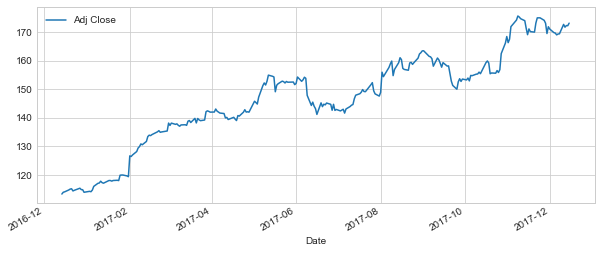

In [12]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

**Erzeuge das gleiche Diagramm für das "Volume" der Aktie (gleichnamige Spalte).**

In [13]:
# Dein Code hier

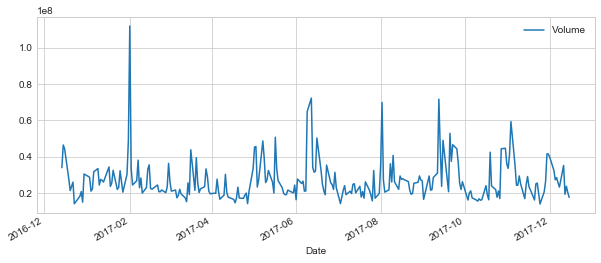

In [14]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Jetzt wo wir die Visualisierung für das Handelsvolumen pro Tag (Volume) und den Schlusspreis gesehen haben können wir damit fortfahren den laufenden Durchschnitt der Aktie berechnen.

Für mehr Informationen zum laufenden Durchschnitt gibt es folgende Quellen:
1. https://de.wikipedia.org/wiki/Gleitender_Mittelwert
2. http://www.investopedia.com/terms/m/movingaverage.asp
3. http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

Glücklicherweise beinhaltet Pandas einen eingebauten Rechner für den laufenden Durchschnitt namens `rolling_mean`. Wir möchten verschiedene laufende Durchschnitte für 10, 20 und 50 Tage berechnen.

**Erstelle eine Liste "ma_day" mit den Elementen 10, 20 und 50.**

In [15]:
ma_day = [10,20,50]

Jetzt können wir jeden laufenden Durchschnitt (en. moving average) "ma" in unserer Liste berechnen. Dazu erstellen wir mit einer for-Schleife für jeden "ma" eine eigene Spalte namens "MA for X days" (wobei wir das X durch die Tage (also "ma") ersetzen wollen. Anschließend können wir diese Spalten mit der `rolling_mean)` Funktion befüllen.

**Berechne die verschiednene laufenden Durchschnitte für AAPL.**

*Hinweis: Schaue für das richtige Format in die Dokumentation von `rolling_mean`.*

In [48]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

/Users/davidmika/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davidmika/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davidmika/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Jetzt können wir uns diese laufenden Durchschnitte im Vergleich zum Schlusspreis (Spalte: Adj Close) in einer Visualisierung anschauen.

**Erstelle mit Matplotlib eine Visualisierung für den Schlusspreis und die verschiedenen laufenden Durchschnitte.**

In [17]:
# Dein Code hier

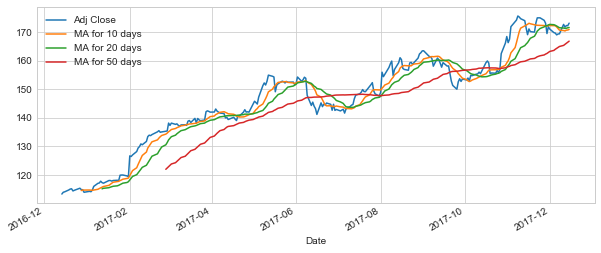

In [18]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

## Analyse der täglichen Rendite

Jetzt wo wir einige grundlegende Analysen abgeschlossen haben können wir fortfahren und etwas mehr ins Detail gehen. Wir werden das Risiko einer Aktie analysieren. Um das zu tun müssen wir uns die tägliche Veränderung der Aktie anschauen. Ihr absoluter Wert alleine genügt uns dazu nicht. Wir können als nächstes Pandas verwenden, um die tägliche Rendite der APPL Aktie zu erhalten. 

**Erstelle eine neue Spalte "daily_returns" im AAPL-DataFrame und trage die tägliche Rendite ein.**

*Hinweis: Die Funktion `pct_change()` kann dir dabei helfen.*

In [19]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

**Visualisiere diese neue Spalte nun mit Matplotlib.**

In [20]:
# Dein Code hier

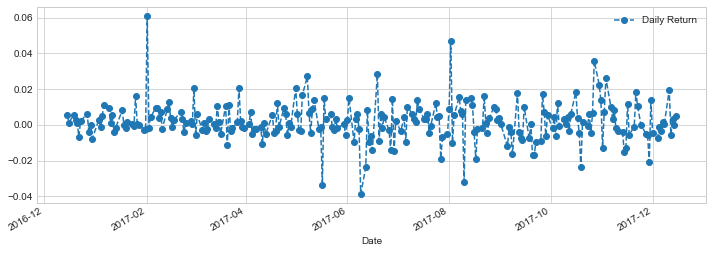

In [21]:
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Jetzt können wir uns einen allgemeinen Überblick über die tägliche Rendite mit einem Histogramm verschaffen. Das Ziel ist nun ein Histogramm und KDE Plot mit Seaborn in die selbe Arbeitsfläche zu zeichnen.

**Erstelle mit Seaborn ein Hisogramm und ein KDE Plot für die täglichen Renditen in der selben Arbeitsfläche.**

In [22]:
# Dein Code hier

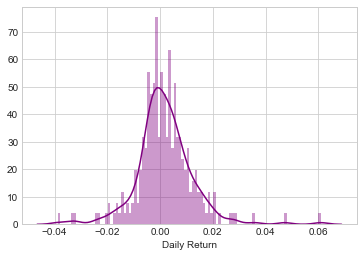

In [23]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Was wäre, wenn wir die Renditen aller Aktien in unsere Liste analysieren wollten? Fahren wir damit fort ein DataFrame zu erstellen, der alle Schlusspreise (Splate: Adj Close) enthält.

**Erstelle ein DataFrame "closing_df", der die Schlusspreise aller Aktien aus unserer Liste beinhaltet.**

In [24]:
closing_df = web.DataReader(['AAPL','GOOGL','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

**Schaue dir den head dieses neuen DataFrames an.**

In [25]:
closing_df.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2017-12-15,173.139893,1177.000000,1071.527466,86.695000
2017-12-14,172.220001,1174.260010,1057.469971,84.690002
2017-12-13,172.270004,1164.130005,1051.390015,85.349998
2017-12-12,171.699997,1165.079956,1048.770020,85.580002
2017-12-11,172.669998,1168.920044,1051.969971,85.230003


Jetzt wo wir alle Schlusspreise beisammen haben können wir uns die täglichen Renditen aller Tech-Aktien anschauen.

**Erstelle einen tech_rets (dt. technologie Renditen) DataFrame, der die täglichen Renditen enthält.**

In [26]:
tech_rets = closing_df.pct_change()

Jetzt können wir die täglichen prozentuellen Renditen von zwei Aktien vergleichen und schauen, wie sie korrelieren. Schauen wir uns zuerst eine Aktie im Vergleich mit sich selbst an.

**Erstelle ein Jointplot mit Seaborn und vergleiche die Renditen von GOOG mit GOOG selbst.**

In [27]:
# Dein Code hier

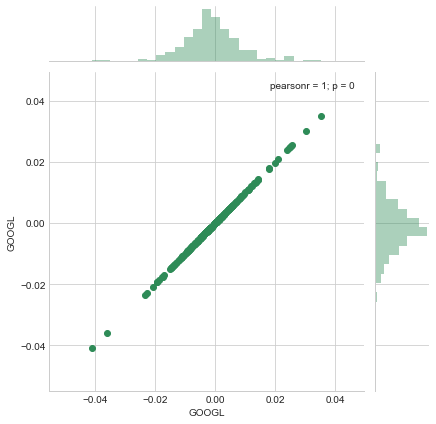

In [28]:
sns.jointplot('GOOGL','GOOGL',tech_rets,kind='scatter',color='seagreen')

Wir sehen hier, dass zwei Aktien, die perfekt (und positiv) miteinander korreliert sind in einer linearen Beziehung ihrer täglichen Renditen stehen. Wir könenn auf die gleiche Art Google und Microsoft vergleichen.

**Erstelle das gleiche Jointplot für GOOG und MSFT.**

In [29]:
# Dein Code hier

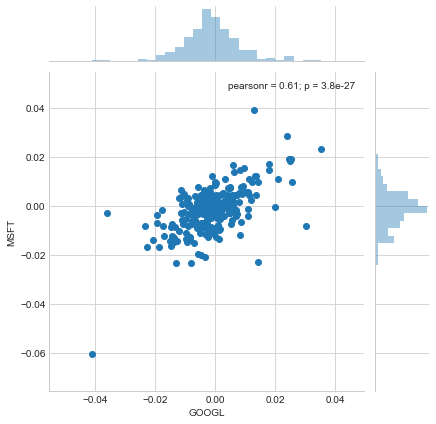

In [30]:
sns.jointplot('GOOGL','MSFT',tech_rets,kind='scatter')

Interessant. Der "pearsonr" Wert (offiziell bekannt als der "Pearson Product-Moment Correlation Coefficient") kann uns einen Hinweis darauf liefern, wie die täglichen prozentualen Renditen korreliert sind. Du findest mehr Informationen unter folgender Adresse:

Pearsonr: 
 - https://de.wikipedia.org/wiki/Korrelationskoeffizient
 - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

Für eine schnelle intuitive Annäherung kann das folgende Bild dienen:

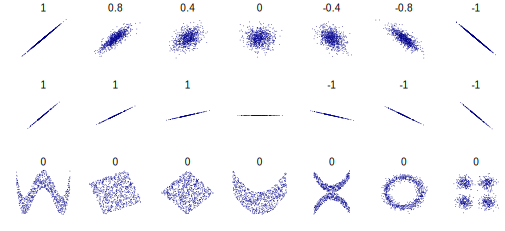

In [1]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn und Pandas machen es uns sehr einfach diesen Vergleich für alle möglichen Kombinationen unserer betrachteten Aktien durchzuführen. Wir können dazu ein Pairplot nutzen.

**Erstelle ein Pairplot mit Seaborn. Betrachtet werden die Technologie-Renditen.**

In [32]:
# Dein Code hier

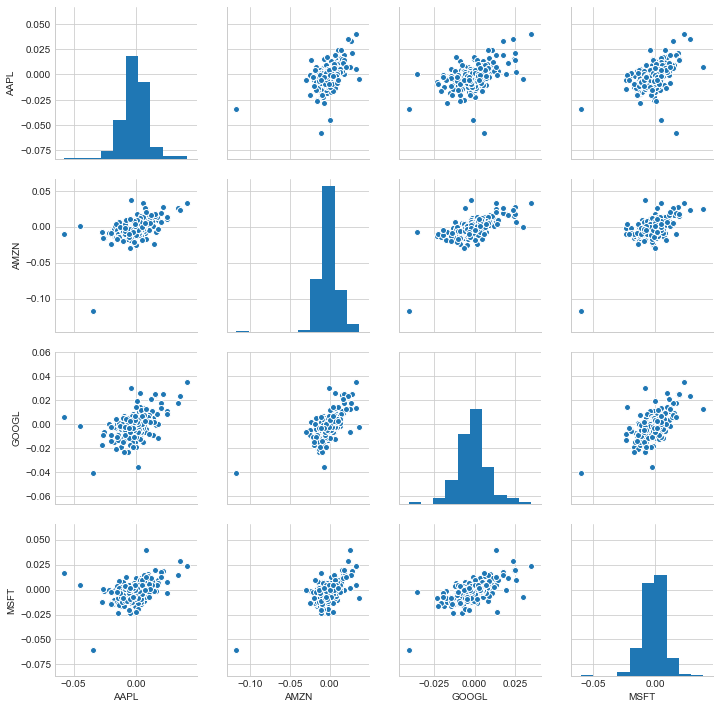

In [33]:
sns.pairplot(tech_rets.dropna())

Oberhalb können wir alle Beziehungen der täglichen Renditen aller betrachteter Aktien sehen. Ein kurzer Blick offenbart eine interessante Korrelation zwischen Google und Amazon. Es könnte interessant sein, diese konkrete Beziehung genauer zu untersuchen. Während `Pairplot` wunderbar einfach ist, können wir `PairGrid` verwenden, um volle Kontrolle über die dargestellten Visualisierungen zu haben. Das schließt ein zu bestimmen, welche Darstellung die Diagonale, die obere "Triangel" und die untere Triangel zeigen.

**Erstelle ein PairGrid und beachte dabei die folgenden Schritte:**
1. Erstelle eine neues Seaborn Diagramm in einem eigenständigen Objekt
2. Nutze `map_upper`, um Scatterplots darzustellen
3. Nutze `map_lower`, um KDE-Plots darzustellen
4. Nutze `map_diag`, um Histogramme darzustellen

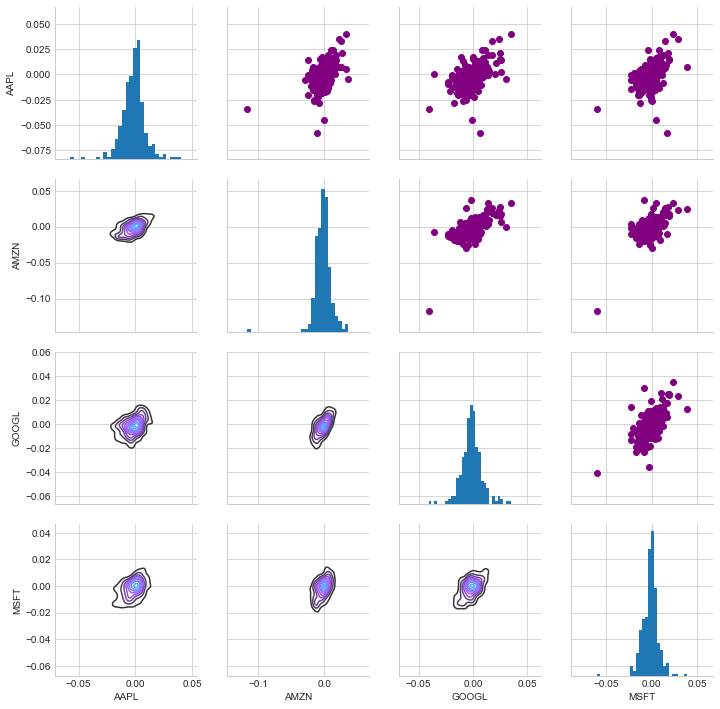

In [34]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

Das gleiche hätten wir auch für die Schlusspreise statt für die Renditen darstellen können.

**Führe die selbe Darstellung erneut durch. Greife dieses Mal auf den "closing_df" DataFrame zu.**

In [35]:
# Dein Code hier

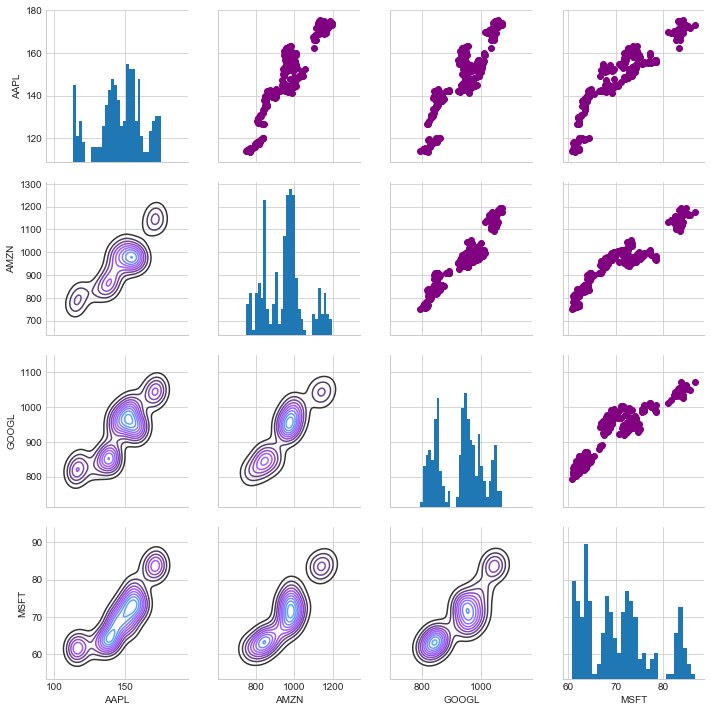

In [36]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

Schließlich können wir auch ein Korrelations-Diagramm (corrplot) erstellen, um numerische Werte für die Korrelation zwischen den täglichen Renditen zu erhalten.

**Berechne die Korrelation für die Tech-Renditen.**

In [37]:
tech_corr = tech_rets.corr()

**Erstelle eine `heatmap` für die Tech-Korrelationen (und schließe die NaN Werte aus).**

In [38]:
# Dein Code hier

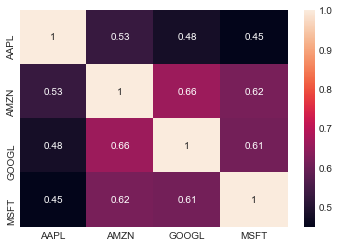

In [39]:
sns.heatmap(tech_corr.dropna(),annot=True)

Fantastisch! Genau wie wir vermutet haben sehen wir hier sowohl visuell als auch numerisch, dass Amazon und Google die stärkste Korrelation haben. Außerdem ist es interessant zu sehen, dass alle Technologie-Aktien positiv korreliert sind.

Toll! Jetzt wo wir die täglichen Renditen analysiert haben können wir einen Schritt weiter gehen und das damit verbunden Risiko genauer betrachten.

## Risiko Analyse

Es gibt viele Möglichkeiten, wie sich Risiko quantifizieren lässt. Eine der grundlegendsten Wege ist es, die Information zu nuten, die wir bereits erzeugt haben: die täglichen Renditen. Diese lassen sich mit der Standardabweichung der täglichen Renditen vergleichen.

**Erstelle zunächst einen neuen DataFrame "rets", das die Daten aus tech_rets ohne die NaN-Werte enthält.**

In [40]:
rets = tech_rets.dropna()

**Erstelle nun ein `Scatterplot` und beachte folgende Schritte:**
1. Definiere eine Fläche "area" mit Pi * 20 (Pi ist in Numpy enthalten)
2. Erstelle ein Scatterplot, dass die durchschnittliche tägliche Rendite mit der Standardabweichung der täglichen Renditen vergleicht.
3. Folgende Parameter sollen enthalten sein: `alpha=0.5` und `s=area`
4. Definiere folgendes Limit für die y-Achse: `[0.01,0.025]`
5. Definiere folgendes Limit für die x-Achse: `[-0.003,0.004]`
6. Die x-Achse soll "Expected returns" (dt. erwartete Rendite) heißen
7. Die y-Achse soll "Risk" (dt. Risiko) heißen
8. Beschrifte die Punkte wie dargestellt

*Hinweis: Schritt 8 ist wirklich anspruchsvoll. Deshalb zwei Tipps. Erstens können dir die [Annotations](http://matplotlib.org/users/annotations_guide.html) helfen. Zweitens verwendest du am besten eine for-Schleife.*

In [41]:
# Dein Code hier

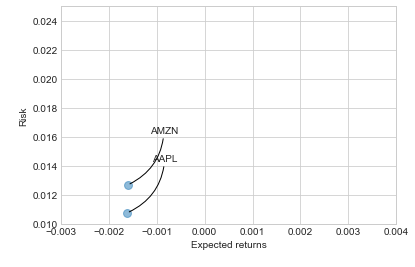

In [42]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.005,0.02])
plt.xlim([-0.003,0.001])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


### Value at Risk

Der Begriff Wert im Risiko oder englisch Value at Risk (VaR) bezeichnet ein Risikomaß für die Risikoposition eines Portfolios im Finanzwesen. Es handelt sich um das Quantil der Verlustfunktion: Der Value at Risk zu einem gegebenen Wahrscheinlichkeitsniveau gibt an, welche Verlusthöhe innerhalb eines gegebenen Zeitraums mit dieser Wahrscheinlichkeit nicht überschritten wird. Dabei betrachten wir ein bestimmtes Konfidenzinterval. Es gibt verschiedene Methoden den Value at Risk zu schätzen. Schauen wir uns eine davon in Aktion an.

#### Value at Risk mit der "Bootstrap" Methode

Mit dieser Methode können wir die empirischen Quantile aus einem Histogram der täglichen Renditen berechnen. Für mehr Infos zu Quantilen schaut hier:
- http://de.wikipedia.org/wiki/Quantil_(Wahrscheinlichkeitstheorie)
- http://en.wikipedia.org/wiki/Quantile

**Erstelle zuerst das Histogramm der AAPL täglichen Renditen (mit `bins=100` und ohne NaN-Werte).**

In [43]:
# Dein Code hier

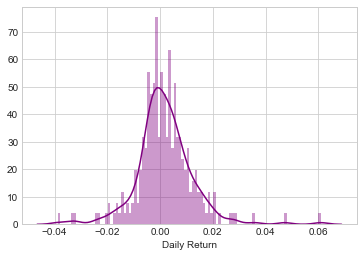

In [44]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

**Verwende `quantile()`, um das 5% (0.05) Quantil für APPL aus "rets" zu berechnen.**

In [45]:
rets['AAPL'].quantile(0.05)

-0.01789290634916596

Das empirische 0.05 Quantil der täglichen Rendite ist -0.018. Das bedeutet, dass mit 95% Konfidenz unser schlimmster täglicher Verlust nicht über 1,8% liegen wird. Wenn wir 1 Million Euro investiert haben, dann ist unser ein-tages 5% VAR 18.000€ (1.000.000€ * 0.018).

Du kannst dies selbstständig für weitere Aktien durchführen, wenn du möchtest.

# Gut gemacht!